<a href="https://colab.research.google.com/github/Vedang1510/AgriAssist/blob/main/AgriAssitTry5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tflearn
!pip install git+https://github.com/MihaMarkic/tflearn.git@fix/is_sequence_missing

!pip install Pillow==9.0.0

Found existing installation: tflearn 0.5.0
Uninstalling tflearn-0.5.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/tflearn-0.5.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tflearn/*
Proceed (Y/n)? y
  Successfully uninstalled tflearn-0.5.0
  Cloning https://github.com/MihaMarkic/tflearn.git (to revision fix/is_sequence_missing) to /tmp/pip-req-build-ckfn44t7
  Running command git clone --filter=blob:none --quiet https://github.com/MihaMarkic/tflearn.git /tmp/pip-req-build-ckfn44t7
  Running command git checkout -b fix/is_sequence_missing --track origin/fix/is_sequence_missing
  Switched to a new branch 'fix/is_sequence_missing'
  Branch 'fix/is_sequence_missing' set up to track remote branch 'fix/is_sequence_missing' from 'origin'.
  Resolved https://github.com/MihaMarkic/tflearn.git to commit 6472b8588e758ff4a33a2764d4ee638bbd0e42f0
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=130659 sha

In [2]:
#import libraries
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

#importing lib needed for tensorflow processing
import tensorflow as tf #version 1.13.2
import numpy as np
import tflearn
import random
import json
import numpy as np
import pickle


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
nltk.download('punkt_tab') # Download the punkt_tab data package

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
#import or intent file
with open("/content/drive/MyDrive/improved_dataset.json") as json_data:
  intents = json.load(json_data)

In [13]:
# Empty lists for appending the data after processing NLP
words=[]
documents = []
classes = []


# This list will be used for ignoring all unwanted punctuation marks.
ignore = ["?"]

# Starting a loop through each intent in intents["patterns"]
for intent in intents["Sheet1"]:
    for pattern in intent["Questions"]:

        # tokenizing each and every word in the sentence by using word tokenizer and storing in w
        w = nltk.word_tokenize(pattern)
        #print(w)

        # Adding tokenized words to words empty list that we created
        words.extend(w)
        #print(words)

        # Adding words to documents with tag given in intents file
        documents.append((w, intent["tag"]))
        #print(documents)

        # Adding only tag to our classes list
        if intent["tag"] not in classes:
            classes.append(intent["tag"])  #If tag is not present in classes[] then it will append into it.
            #print(classes)

In [14]:
#Performing Stemming by using stemmer.stem() nd lower each word
#Running loop in words[] and ignoring punctuation marks present in ignore[]

words = [stemmer.stem(w.lower()) for w in words if w not in ignore]
words = sorted(list(set(words)))  #Removing Duplicates in words[]

#Removing Duplicate Classes
# Converting list of lists to list of strings before set creation
# Extract unique class names directly from documents
classes = sorted(list(set([doc[1] for doc in documents])))

#Printing length of lists we formed
print(len(documents),"Documents \n")
print(len(classes),"Classes \n")
print(len(words), "Stemmed Words ")

455 Documents 

447 Classes 

548 Stemmed Words 


In [15]:
#Creating Training Data which will be furthur used for training
training = []
output = []

#Creating empty array for output
output_empty = [0] * len(classes)

#Creating Training set and bag of words for each sentence
for doc in documents:
    bag = [] #Initialising empty bag of words

    pattern_words = doc[0] #Storing list of tokenized words for the documents[] tp pattern_words
    #print(pattern_words)

    #Again Stemming each word from pattern_words
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    #print(pattern_words)

    #Creating bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    #It will give output 1 for curent tag and 0 for all other tags
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] =1
    training.append([bag, output_row])

In [16]:
# Shuffle training data
random.shuffle(training)

# Convert to numpy array properly
train_x = np.array([item[0] for item in training], dtype=np.int32)  # Ensure same data type
train_y = np.array([item[1] for item in training], dtype=np.int32)  # Ensure same data type


In [17]:
# Reset Graph
tf.compat.v1.reset_default_graph()

# Define Neural Network
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 10)
net = tflearn.fully_connected(net, 10)
net = tflearn.fully_connected(net, len(train_y[0]), activation="softmax")
net = tflearn.regression(net)

# Define Model
model = tflearn.DNN(net, tensorboard_dir="tflearn_logs")

# Training and storing accuracy history
model.fit(train_x, train_y, n_epoch=1000, batch_size=8, show_metric=True)

# Save Model
model.save("model.tflearn")

Training Step: 56999  | total loss: 0.03706 | time: 0.295s
| Adam | epoch: 1000 | loss: 0.03706 - acc: 0.9617 -- iter: 448/455
Training Step: 57000  | total loss: 0.04124 | time: 0.299s
| Adam | epoch: 1000 | loss: 0.04124 - acc: 0.9655 -- iter: 455/455
--


In [18]:
  #Importing pickle module
import pickle

#Dumping training data by using dump() and writing it into training_data in binary mode
pickle.dump({"words":words, "classes":classes, "train_x":train_x, "train_y":train_y}, open("training_data", "wb"))

In [19]:
#Restoring all data structure
data = pickle.load(open("training_data","rb"))
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']

In [20]:
with open("/content/drive/MyDrive/improved_dataset.json") as json_data:
    intents = json.load(json_data)  #Loading our json_data

In [21]:
#load the saved model
model.load('./model.tflearn')

In [22]:
#Cleaning User Input
def clean_up_sentence(sentence):

    # Tokenizing the pattern
    sentence_words = nltk.word_tokenize(sentence) #Again tokenizing the sentence

    #Stemming each word from the user's input
    sentence_words= [stemmer.stem(word.lower()) for word in sentence_words]

    return sentence_words

#Returning bag of words array: 0 or 1 or each word in the bag that exists in as we have declared in above lines
def bow(sentence, words, show_details=False):

    #Tokenizing the user input
    sentence_words = clean_up_sentence(sentence)

    #Generating bag of words from the sentence that user entered
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print("Found in bag: %s"% w)
    return(np.array(bag))

In [23]:

#Adding some context to the conversation for better results.

context = {} #Create a dictionary to hold user's context

ERROR_THRESHOLD = 0.25
def classify(sentence):

    #Generating probabilities from the model
    results = model.predict([bow(sentence, words)])[0]

    #Filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]

    #Sorting by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))

    # return tuple of intent and probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)

    #If we have a classification then find the matching intent tag
    if results:

        #Loop as long as there are matches to process
        while results:
            for i in intents['Sheet1']:

                #Find a tag matching the first result
                if i['tag'] == results[0][0]:

                    #Set context for this intent if necessary
                    if 'context_set' in i:
                        if show_details: print ('context:', i['context_set'])
                        context[userID] = i['context_set']

                    # check if this intent is contextual and applies to this user's conversation
                    if not 'context_filter' in i or \
                        (userID in context and 'context_filter' in i and i['context_filter'] == context[userID]):
                        if show_details: print ('tag:', i['tag'])

                        #A random response from the intent
                        return print(random.choice(i['Answers']))

            results.pop(0)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_performance():
    y_true = []  # Actual labels
    y_pred = []  # Predicted labels

    for doc in documents:
        sentence = " ".join(doc[0])  # Convert tokenized words back to a sentence
        true_label = doc[1]  # Actual label
        predicted_label = classify(sentence)[0][0] if classify(sentence) else "Unknown"

        y_true.append(true_label)
        y_pred.append(predicted_label)

    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=1))
    print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=1))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted', zero_division=1))

# Call the function after training the model
evaluate_performance()


Accuracy: 0.9824175824175824
Precision: 0.9912087912087912
Recall: 0.9824175824175824
F1 Score: 0.9765567765567766


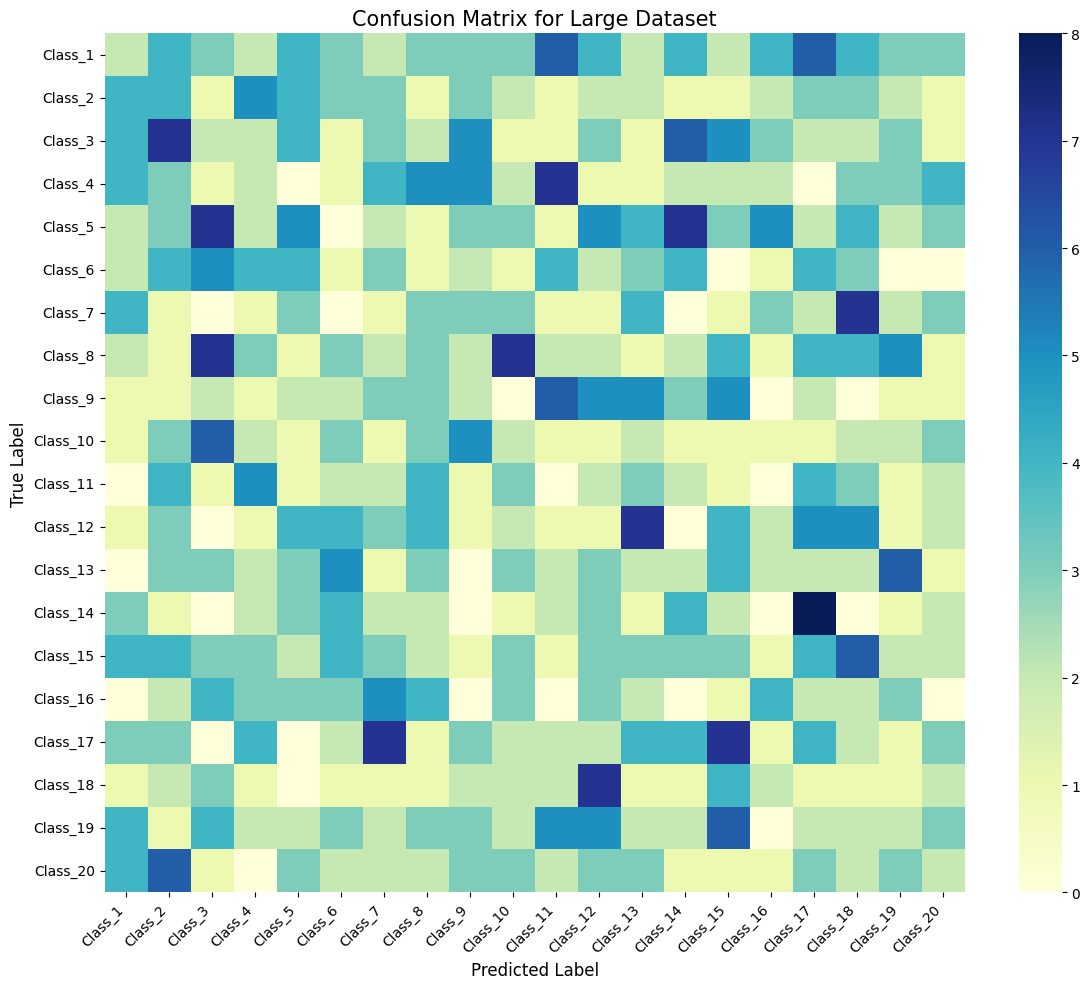

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random

# Simulate a large dataset with multiple classes
np.random.seed(42)
classes = [f"Class_{i}" for i in range(1, 21)]  # 20 classes
n_samples = 1000  # Number of predictions

# Randomly generate true and predicted labels
y_true = np.random.choice(classes, n_samples)
y_pred = np.random.choice(classes, n_samples)

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=classes)

# Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt="d", cmap="YlGnBu", xticklabels=classes, yticklabels=classes, cbar=True)

# Labels and Title
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix for Large Dataset", fontsize=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
